In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils.ml_utils import read_one_df, read_all_df, clean_data, transform_tohourdata, transform_todailydata

In [2]:
data_raw = read_one_df()

In [7]:
data_dict= read_all_df()

In [ ]:
for k, v in data_dict.items():
    print(k, v.shape)

0 (264673, 21)
1 (264673, 21)
2 (264673, 21)
3 (264673, 21)


data

In [67]:
data.head()

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,P_avg,Yt_avg,Rs_avg,Rbt_avg,Rm_avg
Date_time_nr,,,,,,,,,,,,
1356994800,5.39,1011.0,75.0,5.66,180.0,0.0,0.0,801.22998,20.129999,16.950001,26.049999,4298.0498
1356995400,5.39,1011.0,75.0,5.66,180.0,0.0,0.0,943.16998,21.420000,17.139999,26.100000,5011.9600
1356996000,5.39,1011.0,75.0,5.66,180.0,0.0,0.0,998.48999,22.049999,17.150000,26.219999,5303.4302
1356996600,5.39,1011.0,75.0,5.66,180.0,0.0,0.0,837.96002,22.299999,16.910000,26.309999,4498.1299
1356997200,5.39,1011.0,75.0,5.66,180.0,0.0,0.0,871.57001,22.600000,16.920000,26.389999,4674.0801


# c lean data

In [3]:
data_clean = clean_data(data_raw) 

In [ ]:
#data_clean.head()

In [ ]:
data= transform_tohourdata(data_clean) 

day_data = transform_todailydata(data_clean)   

2013-01-01 00:00 UTC → 1356998400

2014-01-01 00:00 UTC → 1388534400

2015-01-01 00:00 UTC → 1420070400

2016-01-01 00:00 UTC → 1451606400

2017-01-01 00:00 UTC → 1483228800

In [62]:
unix_to_dates(day_data).head()

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,P_avg,Yt_avg,Rs_avg,Rbt_avg,Rm_avg
2013-01-01,5.314167,1012.458333,88.083333,5.037083,212.500000,0.332917,0.0,782.613541,21.278889,15.169167,26.237500,4363.052434
2013-01-02,2.317500,1027.291667,93.625000,3.236250,222.500000,0.000000,0.0,160.549097,23.415347,8.815694,21.614028,1101.259163
2013-01-03,4.582500,1037.041667,95.166667,5.037083,209.583333,0.041667,0.0,396.093055,24.502431,13.728264,24.948333,2470.045492
2013-01-04,7.101250,1037.791667,97.666667,2.915417,246.250000,0.000000,0.0,117.150973,24.213333,9.997222,24.648403,943.412223
2013-01-05,5.635000,1034.791667,94.166667,2.014167,232.083333,0.000000,0.0,62.375833,22.997153,7.095139,22.001805,517.576109


In [63]:
y2013 = day_data.loc[1356998400 : 1388534400 - 3600 , 'P_avg']
y2014 = day_data.loc[1388534400 : 1420070400 - 3600 , 'P_avg']
y2015 = day_data.loc[1420070400 : 1451606400 - 3600 , 'P_avg']
y2016 = day_data.loc[1451606400 : 1483228800 - 3600 , 'P_avg']
y2017 = day_data.loc[1483228800 :  , 'P_avg']

year_datas = {
    2013 : unix_to_dates(y2013)
    ,2014 : unix_to_dates(y2014) 
    ,2015 : unix_to_dates(y2015) 
    ,2016 : unix_to_dates(y2016) 
    ,2017 : unix_to_dates(y2017) 
}

In [ ]:
for k,v  in year_datas.items():
    print(v.shape)

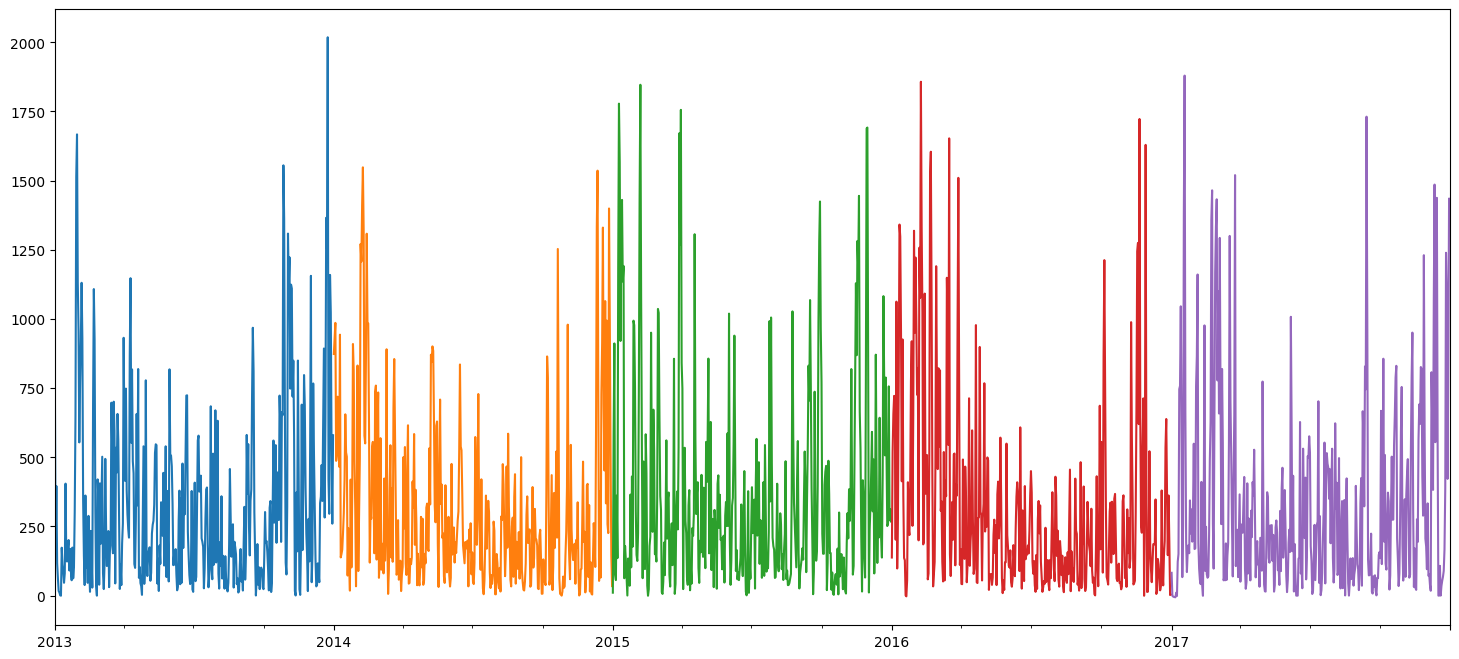

In [64]:
for k,v  in year_datas.items():
    v.plot(figsize=(18,8))

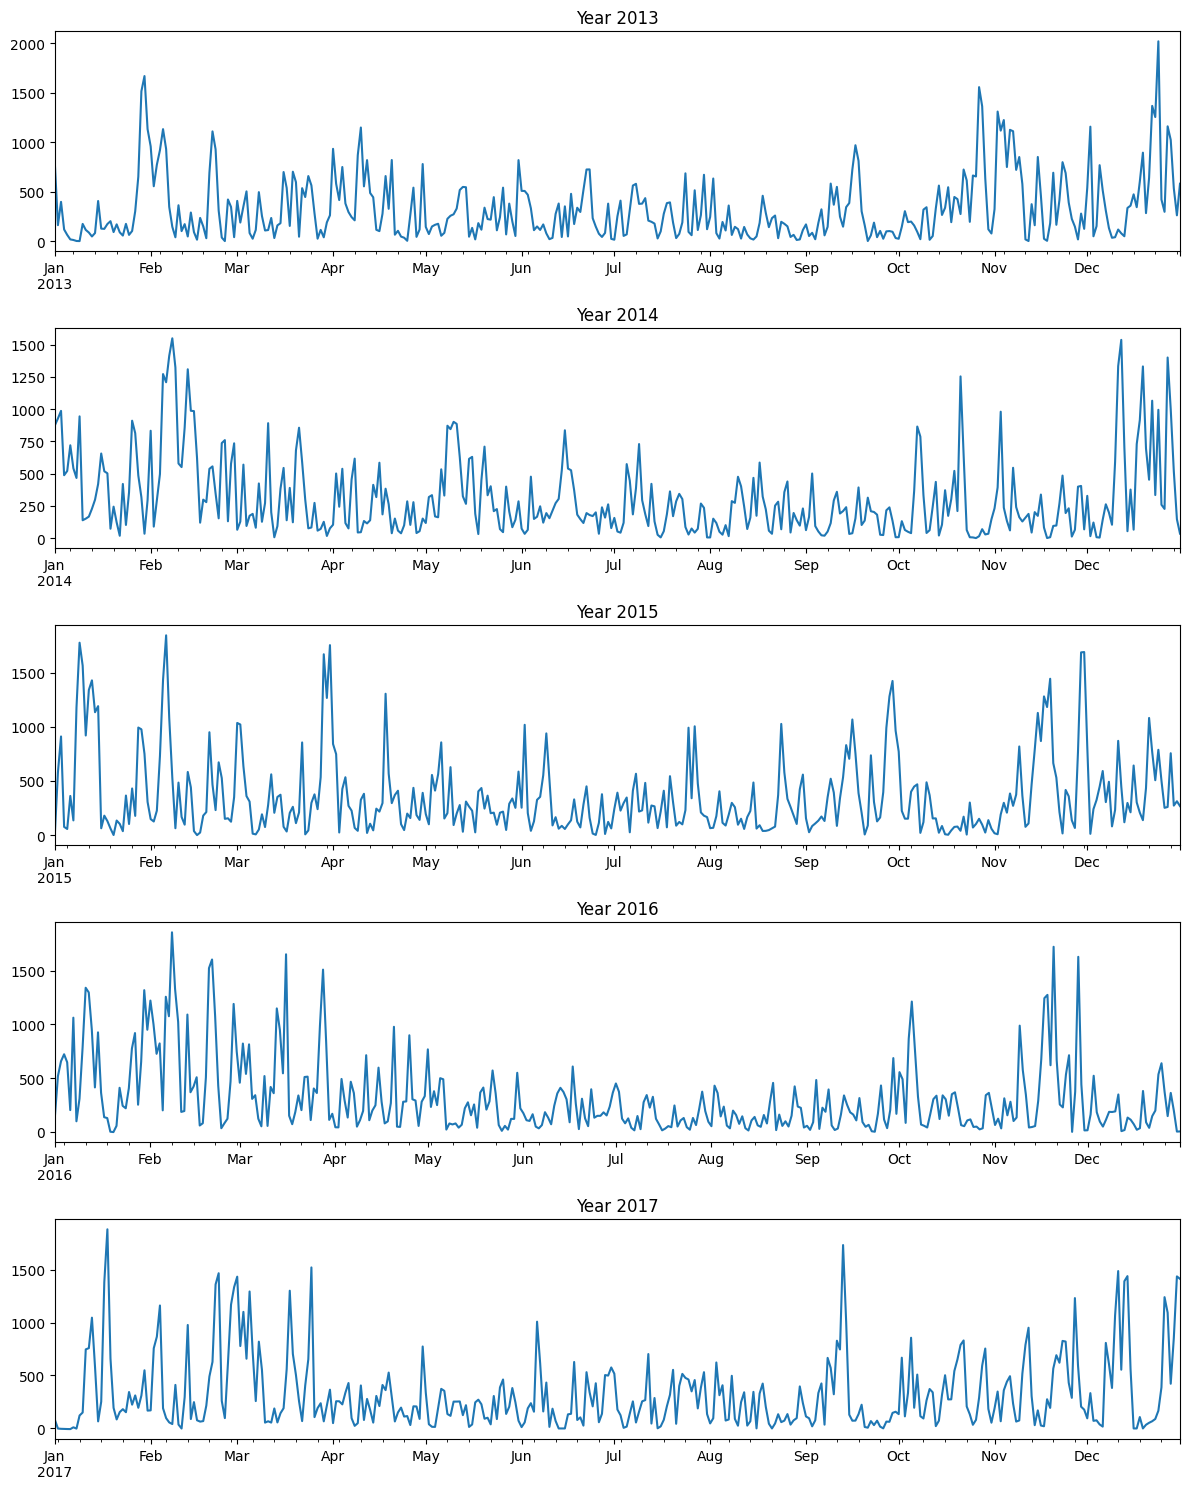

In [65]:
plot_power_year(year_datas)

# Comparison

In [66]:
data_dict= read_all_df()


In [70]:
datadaily_dict = { k: transform_todailydata(clean_data(data))  for k, data in data_dict.items()}

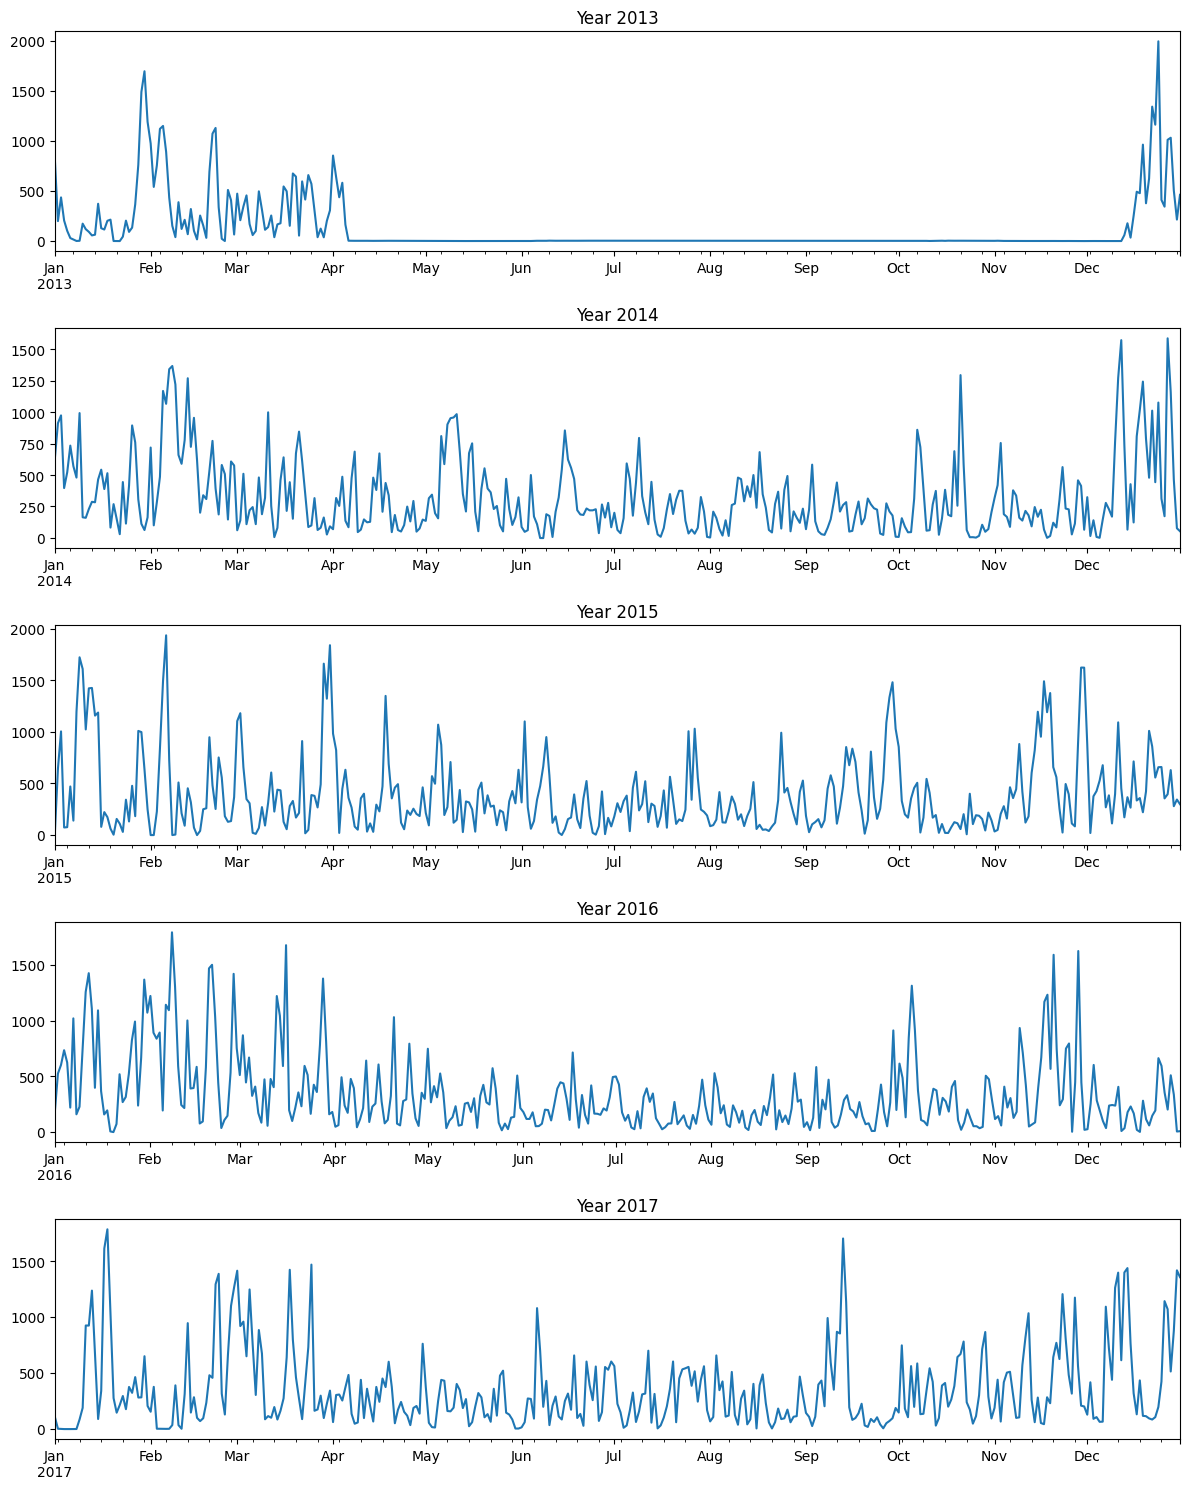

In [ ]:
n = 3
data = datadaily_dict[n]
y2013 = data.loc[1356998400 : 1388534400 - 3600 , 'P_avg']
y2014 = data.loc[1388534400 : 1420070400 - 3600 , 'P_avg']
y2015 = data.loc[1420070400 : 1451606400 - 3600 , 'P_avg']
y2016 = data.loc[1451606400 : 1483228800 - 3600 , 'P_avg']
y2017 = data.loc[1483228800 :  , 'P_avg']

year_datas = {
    2013 : unix_to_dates(y2013)
    ,2014 : unix_to_dates(y2014) 
    ,2015 : unix_to_dates(y2015) 
    ,2016 : unix_to_dates(y2016) 
    ,2017 : unix_to_dates(y2017) 
    }
plot_power_year(year_datas)